In [11]:
# !pip install chart_studio
# !pip install windrose
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
# from windrose import WindroseAxes
import os
%matplotlib inline 


In [12]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_fb2ecfbf09d64f5893a02b6c5246459e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='4ZGsGNcUA1xI_LfHDY8s9-TRkLXXo3irnLyigtga6llK',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_fb2ecfbf09d64f5893a02b6c5246459e.get_object(Bucket='windenergypredictortest-donotdelete-pr-2rw1w4x9ai0weh',Key='T1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data_T_start = pd.read_csv(body)
data_T_start.head()


,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [13]:
turbine_no="T1" #for powercurve graph

In [14]:
data_T_start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
Date/Time                        50530 non-null object
LV ActivePower (kW)              50530 non-null float64
Wind Speed (m/s)                 50530 non-null float64
Theoretical_Power_Curve (KWh)    50530 non-null float64
Wind Direction (°)               50530 non-null float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [15]:
data = data_T_start.copy()
data1_T=data_T_start.copy()

In [16]:
data1_T.rename(columns={'LV ActivePower (kW)':'ActivePower(kW)',"Wind Speed (m/s)":"WindSpeed(m/s)","Wind Direction (°)":"Wind_Direction"},
                inplace=True)
data1_T.head()

,Date/Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind_Direction
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [17]:
data1_T.rename(columns={'Date/Time':'Time'},inplace=True)
data1_T.head()

,Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind_Direction
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [18]:
#function for finding months
def find_month(x):
    if " 01 " in x:
        return "Jan"
    elif " 02 " in x:
        return "Feb"
    elif " 03 " in x:
        return "March"    
    elif " 04 " in x:
        return "April"    
    elif " 05 " in x:
        return "May"    
    elif " 06 " in x:
        return "June"    
    elif " 07 " in x:
        return "July"    
    elif " 08 " in x:
        return "August"    
    elif " 09 " in x:
        return "Sep"    
    elif " 10 " in x:
        return "Oct"    
    elif " 11 " in x:
        return "Nov"    
    else:
        return "Dec"    

In [19]:
#add months
data1_T['Month']=data1_T.Time.apply(find_month)

In [20]:
data1_T.Month.unique()

array(['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'August',
       'Sep', 'Oct', 'Nov', 'Dec'], dtype=object)

In [21]:
data1_T.head()

,Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind_Direction,Month
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,Jan
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,Jan
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,Jan
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,Jan
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,Jan


In [22]:
#function for rewriting wind speed for 0.5 intervals. 
#For example: wind speeds between 3.25 and 3.75 turns 3.5,wind speeds between 3.75 and 4.25 turns 4.0
def mean_speed(x):
    list=[]
    i=0.25
    while i<=25.5:
        list.append(i)
        i+=0.5
        
    for i in list:
        if x < i:
            x=i-0.25
            return x

In [23]:
#adding a new column as "mean_WindSpeed" with function mean_speed().
data1_T["mean_WindSpeed"]=data1_T["WindSpeed(m/s)"].apply(mean_speed)
data1_T.head()

,Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind_Direction,Month,mean_WindSpeed
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,Jan,5.5
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,Jan,5.5
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,Jan,5.0
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,Jan,5.5
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,Jan,5.5


In [24]:
#function for rewriting wind direction for 30 intervals. 
#For example: wind directions between 15 and 45 turns 30,wind speeds between 45 and 75 turns 60
def mean_direction(x):
    list=[]
    i=15
    while i<=375:
        list.append(i)
        i+=30
        
    for i in list:
        if x < i:
            x=i-15
            if x==360:
                return 0
            else:
                return x

In [25]:
#adding a new column as "mean_Direction" with function mean_direction().
data1_T["mean_Direction"]=data1_T["Wind_Direction"].apply(mean_direction)
data1_T.head()

,Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind_Direction,Month,mean_WindSpeed,mean_Direction
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,Jan,5.5,270
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,Jan,5.5,270
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,Jan,5.0,270
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,Jan,5.5,270
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,Jan,5.5,270


In [26]:
#function for rewriting wind direction with letters. 
#For example: 0=N, 30=NNE 60=NEE etc.
def find_direction(x):
    if x==0:
        return "N"
    if x==30:
        return "NNE"
    if x==60:
        return "NEE" 
    if x==90:
        return "E" 
    if x==120:
        return "SEE" 
    if x==150:
        return "SSE" 
    if x==180:
        return "S" 
    if x==210:
        return "SSW" 
    if x==240:
        return "SWW" 
    if x==270:
        return "W" 
    if x==300:
        return "NWW" 
    if x==330:
        return "NNW"
  

In [27]:
#adding a new column as "Direction" with function find_direction().
data1_T["Direction"]=data1_T["mean_Direction"].apply(find_direction)
data1_T.head()

,Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind_Direction,Month,mean_WindSpeed,mean_Direction,Direction
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,Jan,5.5,270,W
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,Jan,5.5,270,W
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,Jan,5.0,270,W
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,Jan,5.5,270,W
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,Jan,5.5,270,W


In [28]:
#Number of wind speed values between 3.5 and 25. 
len(data1_T["WindSpeed(m/s)"][(data1_T["WindSpeed(m/s)"]>3.5) & (data1_T["WindSpeed(m/s)"]<=25)])

40634

In [29]:
#Values bigger than 25. 
data1_T["WindSpeed(m/s)"][data1_T["WindSpeed(m/s)"]>25].value_counts()

25.206011    1
Name: WindSpeed(m/s), dtype: int64

In [30]:
#Remove the data that wind speed is smaller than 3.5 and bigger than 25.5
#We do that because according to turbine power curve turbine works between these values.
data2_T=data1_T[(data1_T["WindSpeed(m/s)"]>3.5) & (data1_T["WindSpeed(m/s)"]<=25.5)]

In [31]:
#Number of values where wind speed is bigger than 3.5 and active power is zero. 
#If wind speed is bigger than 3.5 and active power is zero, this means turbine is out of order. we must eliminate these.
len(data2_T["ActivePower(kW)"][(data2_T["ActivePower(kW)"]==0)&(data2_T["WindSpeed(m/s)"]>3.5)])

2217

In [32]:
#Eliminate datas where wind speed is bigger than 3.5 and active power is zero.
data3_T=data2_T[((data2_T["ActivePower(kW)"]!=0)&(data2_T["WindSpeed(m/s)"]>3.5)) | (data2_T["WindSpeed(m/s)"]<=3.5)]

In [33]:
#Number of values
len(data3_T["WindSpeed(m/s)"])

38418

In [34]:
data3_T.head(10)

,Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind_Direction,Month,mean_WindSpeed,mean_Direction,Direction
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,Jan,5.5,270,W
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,Jan,5.5,270,W
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,Jan,5.0,270,W
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,Jan,5.5,270,W
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,Jan,5.5,270,W
5,01 01 2018 00:50,402.391998,5.604052,499.436385,264.578613,Jan,5.5,270,W
6,01 01 2018 01:00,447.605713,5.793008,557.372363,266.163605,Jan,6.0,270,W
7,01 01 2018 01:10,387.242188,5.306050,414.898179,257.949493,Jan,5.5,270,W
8,01 01 2018 01:20,463.651215,5.584629,493.677652,253.480698,Jan,5.5,240,SWW
9,01 01 2018 01:30,439.725708,5.523228,475.706783,258.723785,Jan,5.5,270,W


In [35]:
#the mean value of Nordex_Powercurve(kW) when mean_WindSpeed is 5.5
data3_T["Theoretical_Power_Curve (KWh)"][data3_T["mean_WindSpeed"]==5.5].mean()

472.0957519264287

In [36]:
#we create clean data and add a columns where calculating losses. 
#Loss is difference between the Nordex_Powercurve and ActivePower. 
data_T_clean=data3_T.sort_values("Time")
data_T_clean["Loss_Value(kW)"]=data_T_clean["Theoretical_Power_Curve (KWh)"]-data_T_clean["ActivePower(kW)"]
data_T_clean["Loss(%)"]=data_T_clean["Loss_Value(kW)"]/data_T_clean["Theoretical_Power_Curve (KWh)"]*100
#round the values to 2 digit.
data_T_clean=data_T_clean.round({'ActivePower(kW)': 2, 'WindSpeed(m/s)': 2, 'Theoretical_Power_Curve (KWh)': 2,
                                   'Wind_Direction': 2, 'Loss_Value(kW)': 2, 'Loss(%)': 2})

data_T_clean.head()

,Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind_Direction,Month,mean_WindSpeed,mean_Direction,Direction,Loss_Value(kW),Loss(%)
0,01 01 2018 00:00,380.05,5.31,416.33,259.99,Jan,5.5,270,W,36.28,8.71
1,01 01 2018 00:10,453.77,5.67,519.92,268.64,Jan,5.5,270,W,66.15,12.72
2,01 01 2018 00:20,306.38,5.22,390.90,272.56,Jan,5.0,270,W,84.52,21.62
3,01 01 2018 00:30,419.65,5.66,516.13,271.26,Jan,5.5,270,W,96.48,18.69
4,01 01 2018 00:40,380.65,5.58,491.70,265.67,Jan,5.5,270,W,111.05,22.59


In [37]:
#creating summary speed dataframe from clean data.
DepGroupT_speed = data_T_clean.groupby("mean_WindSpeed")
data_T_speed=DepGroupT_speed.mean()
#removing the unnecessary columns.
data_T_speed.drop(columns={"WindSpeed(m/s)","Wind_Direction","mean_Direction"},inplace=True)
#creating a windspeed column from index values.
listTspeed_WS=data_T_speed.index.copy()
data_T_speed["WindSpeed(m/s)"]=listTspeed_WS
#changing the place of columns.
data_T_speed=data_T_speed[["WindSpeed(m/s)","ActivePower(kW)","Theoretical_Power_Curve (KWh)","Loss_Value(kW)","Loss(%)"]]
#changing the index numbers.
data_T_speed["Index"]=list(range(1,len(data_T_speed.index)+1))
data_T_speed.set_index("Index",inplace=True)
#rounding the values to 2 digit
data_T_speed=data_T_speed.round({"WindSpeed(m/s)": 1, 'ActivePower(kW)': 2, 'Theoretical_Power_Curve (KWh)': 2, 'Loss_Value(kW)': 2, 'Loss(%)': 2})
#creating a count column that shows the number of wind speed from clean data.
data_T_speed["count"]=[len(data_T_clean["mean_WindSpeed"][data_T_clean["mean_WindSpeed"]==i]) 
                        for i in data_T_speed["WindSpeed(m/s)"]]


In [38]:
data_T_speed

,WindSpeed(m/s),ActivePower(kW),Theoretical_Power_Curve (KWh),Loss_Value(kW),Loss(%),count
Index,,,,,,
1,3.5,51.68,68.61,16.94,24.14,675
2,4.0,98.33,127.75,29.42,23.26,1736
3,4.5,183.96,222.48,38.52,17.44,1794
4,5.0,285.47,336.32,50.86,15.24,1725
5,5.5,402.30,472.10,69.80,14.84,2012
6,6.0,546.76,627.10,80.34,12.84,2216
7,6.5,713.07,807.67,94.60,11.76,2274
8,7.0,902.86,1015.80,112.94,11.16,2320
9,7.5,1122.43,1256.94,134.51,10.72,2254


In [39]:
#create summary direction dataframe from clean data.
DepGroupT_direction = data_T_clean.groupby("Direction")
data_T_direction=DepGroupT_direction.mean()
#remove the unnecessary columns.
data_T_direction.drop(columns={"WindSpeed(m/s)","Wind_Direction"},inplace=True)
#create a column from index.
listTdirection_Dir=data_T_direction.index.copy()
data_T_direction["Direction"]=listTdirection_Dir
#change the name of mean_WindSpeed column as  WindSpeed.
data_T_direction["WindSpeed(m/s)"]=data_T_direction["mean_WindSpeed"]
data_T_direction.drop(columns={"mean_WindSpeed"},inplace=True)
#change the place of columns.
data_T_direction=data_T_direction[["Direction","mean_Direction","ActivePower(kW)","Theoretical_Power_Curve (KWh)","WindSpeed(m/s)",
                                     "Loss_Value(kW)","Loss(%)"]]
#change the index numbers.
data_T_direction["Index"]=list(range(1,len(data_T_direction.index)+1))
data_T_direction.set_index("Index",inplace=True)
#create a count column that shows the number of directions from clean data.
data_T_direction["count"]=[len(data_T_clean["Direction"][data_T_clean["Direction"]==i]) 
                        for i in data_T_direction["Direction"]]
#round the values to 2 digit
data_T_direction=data_T_direction.round({'WindSpeed(m/s)': 1,'ActivePower(kW)': 2, 'Theoretical_Power_Curve (KWh)': 2,
                                           'Loss_Value(kW)': 2, 'Loss(%)': 2})
#sort by mean_Direction
data_T_direction=data_T_direction.sort_values("mean_Direction")
data_T_direction.drop(columns={"mean_Direction"},inplace=True)

In [40]:
data_T_direction

,Direction,ActivePower(kW),Theoretical_Power_Curve (KWh),WindSpeed(m/s),Loss_Value(kW),Loss(%),count
Index,,,,,,,
2,N,1171.54,1383.10,7.4,211.56,17.91,1294
4,NNE,1511.73,1739.18,8.4,227.45,13.76,7533
3,NEE,1773.33,1969.08,8.8,195.75,13.02,13042
1,E,1209.27,1345.86,7.4,136.59,3.68,2088
8,SEE,579.82,631.63,5.6,51.80,7.88,485
9,SSE,912.14,1047.23,6.7,135.09,16.16,511
7,S,2409.73,2517.83,11.7,108.10,6.82,3710
10,SSW,2300.71,2439.50,10.9,138.79,8.12,6119
11,SWW,1252.60,1359.33,7.4,106.73,11.59,1663


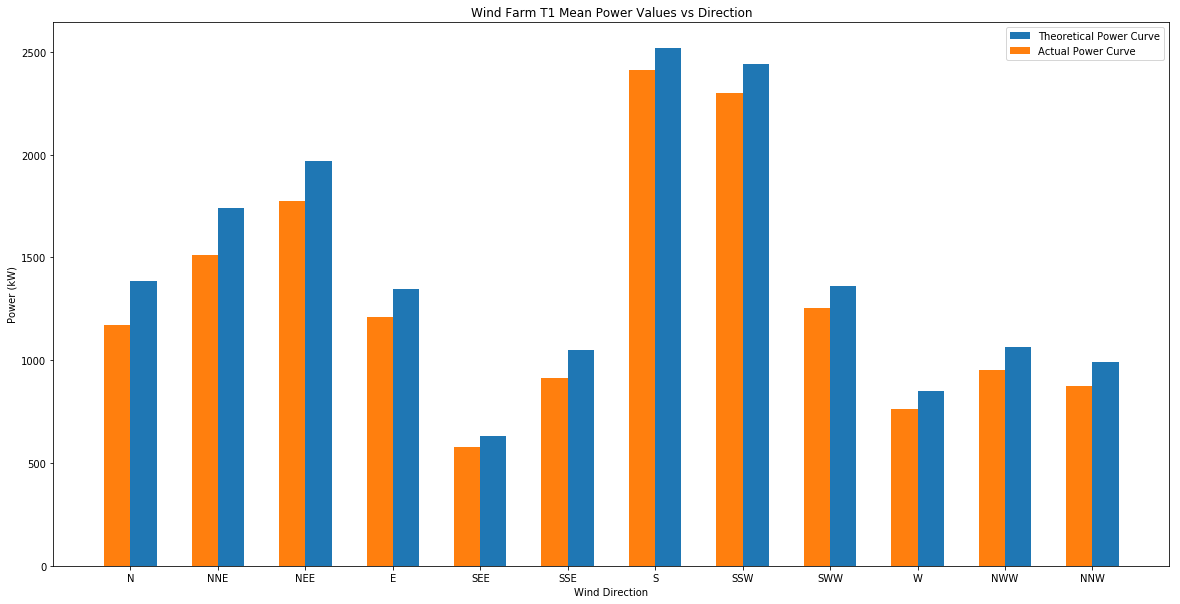

In [41]:
#Drawing graph of mean powers according to wind direction.
def bar_graph():
    fig = plt.figure(figsize=(20,10))
    plt.bar(data_T_direction["Direction"],data_T_direction["Theoretical_Power_Curve (KWh)"],label="Theoretical Power Curve",align="edge",width=0.3)
    plt.bar(data_T_direction["Direction"],data_T_direction["ActivePower(kW)"],label="Actual Power Curve",align="edge",width=-0.3)
    plt.xlabel("Wind Direction")
    plt.ylabel("Power (kW)")
    plt.title("Wind Farm {} Mean Power Values vs Direction".format(turbine_no))
    plt.legend()
    plt.show()
bar_graph()

In [42]:
#creating summary direction total dataframe from direction data.
data_T_direction_total=data_T_direction.copy()
#removing the unnecessary columns.
data_T_direction_total.drop(columns={"count","ActivePower(kW)","Theoretical_Power_Curve (KWh)","Loss_Value(kW)","Loss(%)"},inplace=True)
#calculating the total values from direction data.
data_T_direction_total["Total_Generation(MWh)"]=data_T_direction["ActivePower(kW)"]*data_T_direction["count"]/6000
data_T_direction_total["Theoretical_PC_Total_Generation(MWh)"]=data_T_direction["Theoretical_Power_Curve (KWh)"]*data_T_direction["count"]/6000
data_T_direction_total["Total_Loss(MWh)"]=data_T_direction_total["Theoretical_PC_Total_Generation(MWh)"]-data_T_direction_total["Total_Generation(MWh)"]
data_T_direction_total["Loss(%)"]=data_T_direction_total["Total_Loss(MWh)"]/data_T_direction_total["Theoretical_PC_Total_Generation(MWh)"]*100
#rounding the values to 2 digit
data_T_direction_total=data_T_direction_total.round({'WindSpeed(m/s)': 1,'Total_Generation(MWh)': 2, 'Theoretical_PC_Total_Generation(MWh)': 2,
                                           'Total_Loss(MWh)': 2, 'Loss(%)': 2})
#changing the place of columns.
data_T_direction_total=data_T_direction_total[["Direction","Total_Generation(MWh)","Theoretical_PC_Total_Generation(MWh)","WindSpeed(m/s)",
                                     "Total_Loss(MWh)","Loss(%)"]]

In [43]:
data_T_direction_total

,Direction,Total_Generation(MWh),Theoretical_PC_Total_Generation(MWh),WindSpeed(m/s),Total_Loss(MWh),Loss(%)
Index,,,,,,
2,N,252.66,298.29,7.4,45.63,15.30
4,NNE,1897.98,2183.54,8.4,285.56,13.08
3,NEE,3854.63,4280.12,8.8,425.50,9.94
1,E,420.83,468.36,7.4,47.53,10.15
8,SEE,46.87,51.06,5.6,4.19,8.20
9,SSE,77.68,89.19,6.7,11.51,12.90
7,S,1490.02,1556.86,11.7,66.84,4.29
10,SSW,2346.34,2487.88,10.9,141.54,5.69
11,SWW,347.18,376.76,7.4,29.58,7.85


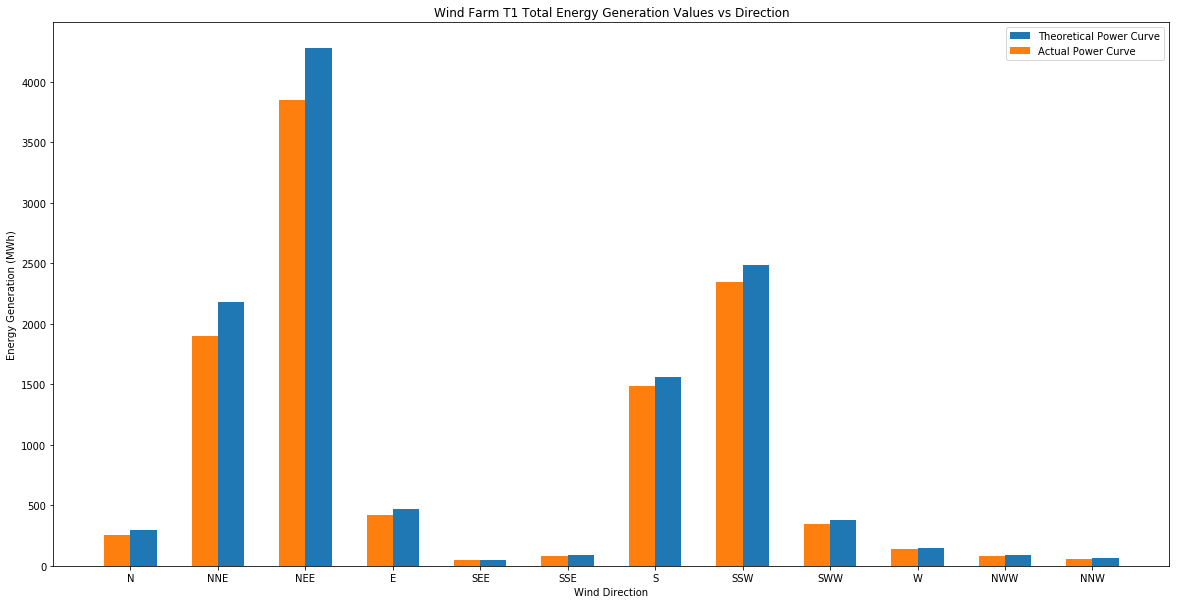

In [44]:
#Drawing graph of total generations according to wind direction.
def bar_graph():
    fig = plt.figure(figsize=(20,10))
    plt.bar(data_T_direction_total["Direction"],data_T_direction_total["Theoretical_PC_Total_Generation(MWh)"],label="Theoretical Power Curve",align="edge",width=0.3)
    plt.bar(data_T_direction_total["Direction"],data_T_direction_total["Total_Generation(MWh)"],label="Actual Power Curve",align="edge",width=-0.3)
    plt.xlabel("Wind Direction")
    plt.ylabel("Energy Generation (MWh)")
    plt.title("Wind Farm {} Total Energy Generation Values vs Direction".format(turbine_no))
    plt.legend()
    plt.show()
bar_graph()

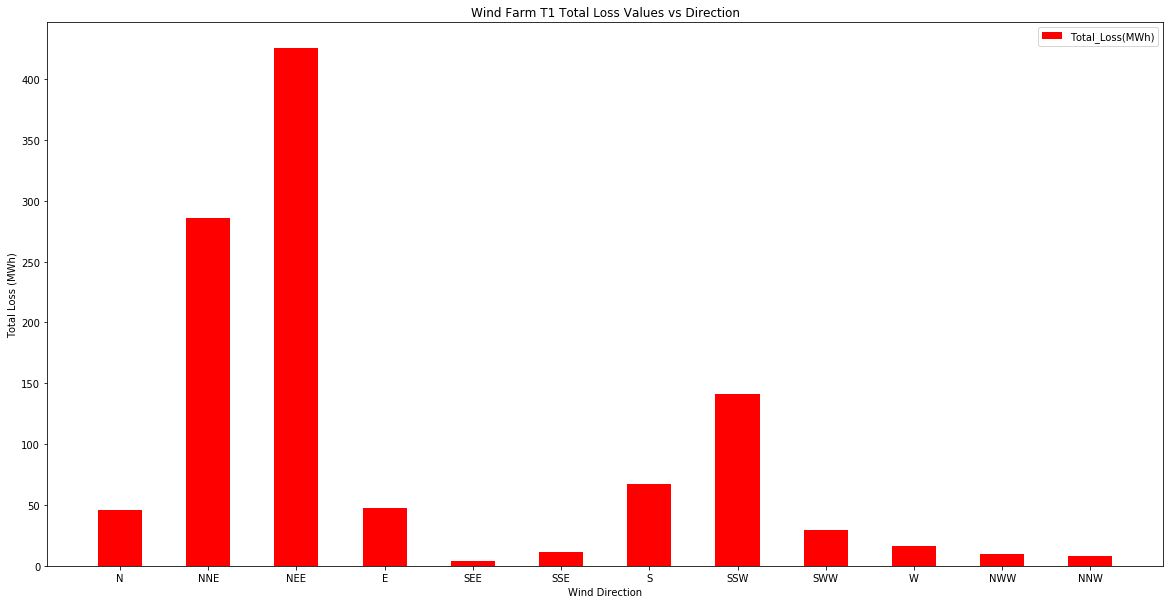

In [45]:
#Drawing graph of total loss according to wind direction.
def bar_graph():
    fig = plt.figure(figsize=(20,10))
    plt.bar(data_T_direction_total["Direction"],data_T_direction_total["Total_Loss(MWh)"],
            label="Total_Loss(MWh)",align="center",width=0.5, color="red",picker=5)
    plt.xlabel("Wind Direction")
    plt.ylabel("Total Loss (MWh)")
    plt.title("Wind Farm {} Total Loss Values vs Direction".format(turbine_no))
    plt.legend()
    plt.show()
bar_graph()

In [46]:
#creating summary dataframes for all directions from clean data in a for loop as we did when creating direction dataframe.
list_data=[]
list_yon=["N","NNE","NEE","E","SEE","SSE","S","SSW","SWW","W","NWW","NNW"]
for i in range(0,12):
    data1T_A=data_T_clean[data_T_clean["Direction"]==list_yon[i]]
    #
    DepGroup_A = data1T_A.groupby("mean_WindSpeed")
    data_T_A=DepGroup_A.mean()
    #
    data_T_A.drop(columns={"WindSpeed(m/s)","Wind_Direction","mean_Direction"},inplace=True)
    #
    listTA_WS=data_T_A.index.copy()
    data_T_A["WindSpeed(m/s)"]=listTA_WS
    #
    data_T_A=data_T_A[["WindSpeed(m/s)","ActivePower(kW)","Theoretical_Power_Curve (KWh)","Loss_Value(kW)","Loss(%)"]]
    #
    data_T_A["Index"]=list(range(1,len(data_T_A.index)+1))
    data_T_A.set_index("Index",inplace=True)
    #
    data_T_A=data_T_A.round({'ActivePower(kW)': 2, 'Theoretical_Power_Curve (KWh)': 2, 'Loss_Value(kW)': 2, 'Loss(%)': 2})
    #
    data_T_A["count"]=[len(data1T_A["mean_WindSpeed"][data1T_A["mean_WindSpeed"]==x]) 
                            for x in data_T_A["WindSpeed(m/s)"]]
    list_data.append(data_T_A)
    
data_T_N=list_data[0]
data_T_NNE=list_data[1]
data_T_NEE=list_data[2]
data_T_E=list_data[3]
data_T_SEE=list_data[4]
data_T_SSE=list_data[5]
data_T_S=list_data[6]
data_T_SSW=list_data[7]
data_T_SWW=list_data[8]
data_T_W=list_data[9]
data_T_NWW=list_data[10]
data_T_NNW=list_data[11]

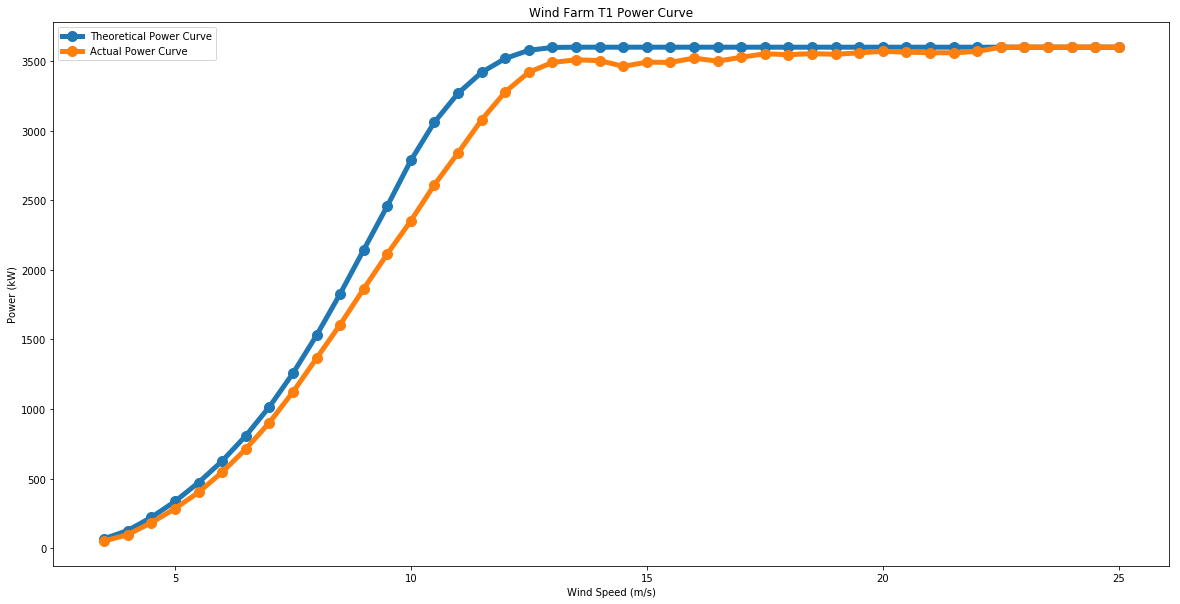

In [47]:
#Drawing power curve of the turbine.
def graph_WT():
    fig = plt.figure(figsize=(20,10))
    plt.plot(data_T_speed["WindSpeed(m/s)"],data_T_speed["Theoretical_Power_Curve (KWh)"],label="Theoretical Power Curve",
             marker="o",markersize=10,linewidth = 5)
    plt.plot(data_T_speed["WindSpeed(m/s)"],data_T_speed["ActivePower(kW)"],label="Actual Power Curve",
             marker="o",markersize=10,linewidth = 5)
    plt.xlabel("Wind Speed (m/s)")
    plt.ylabel("Power (kW)")
    plt.title("Wind Farm {} Power Curve".format(turbine_no))
    plt.legend()
    plt.show()
    fig.savefig("{}_Powercurve.png".format(turbine_no))
    plt.close(fig)
        
graph_WT()

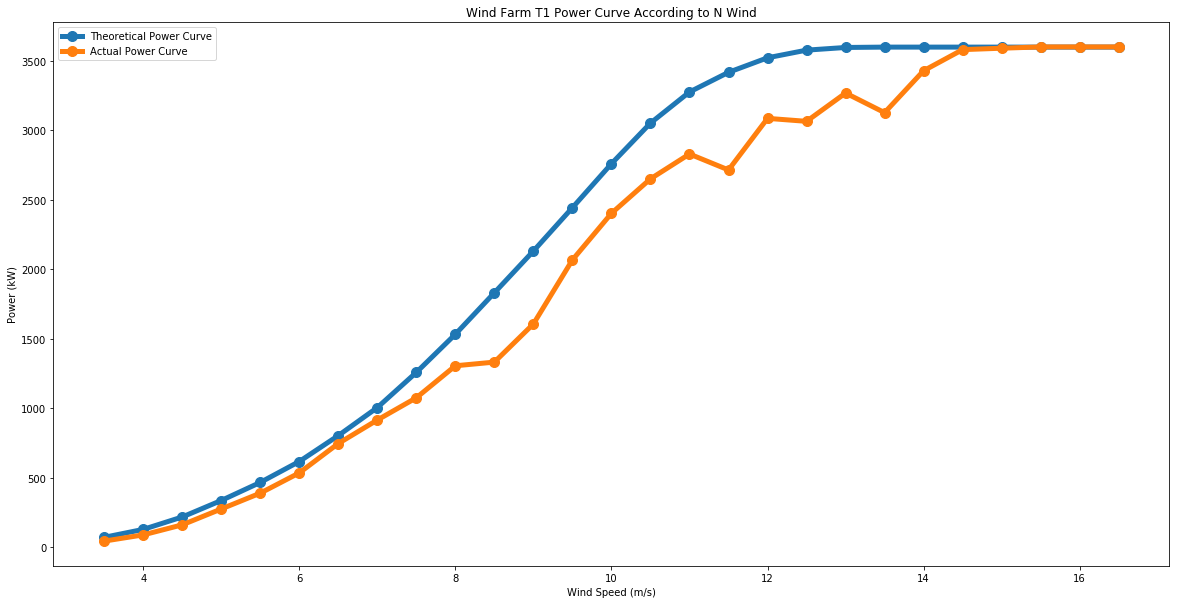

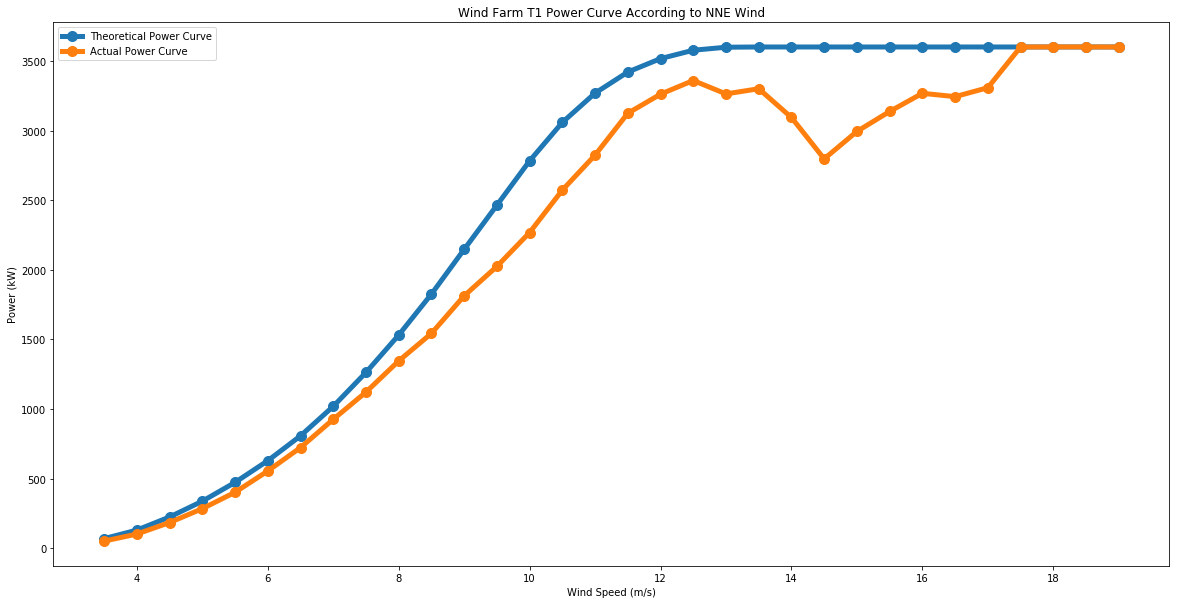

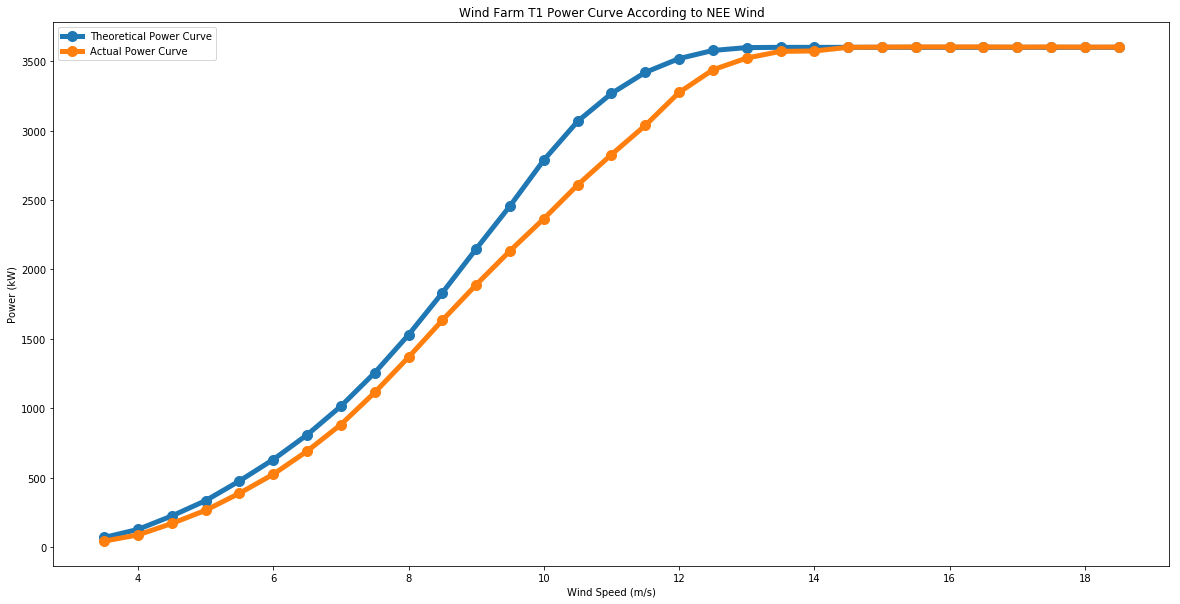

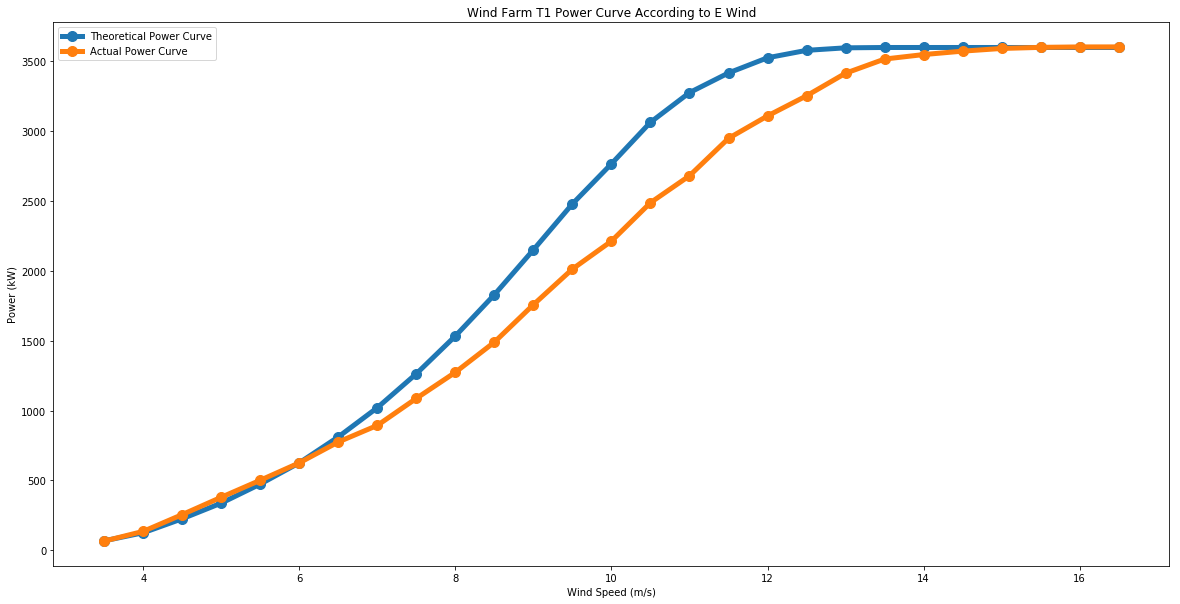

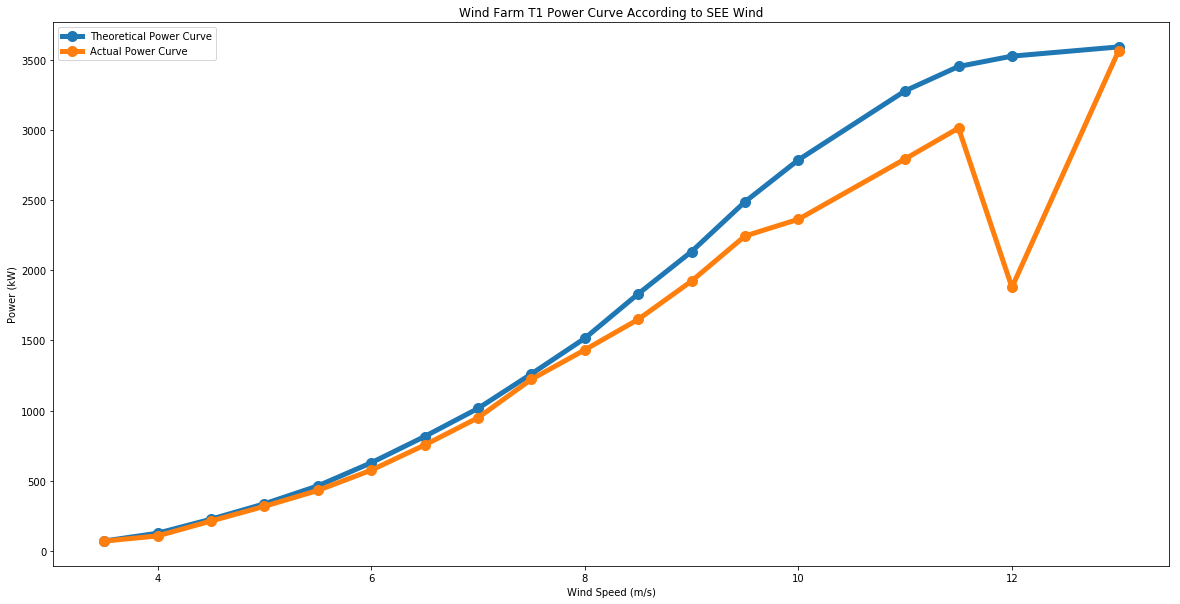

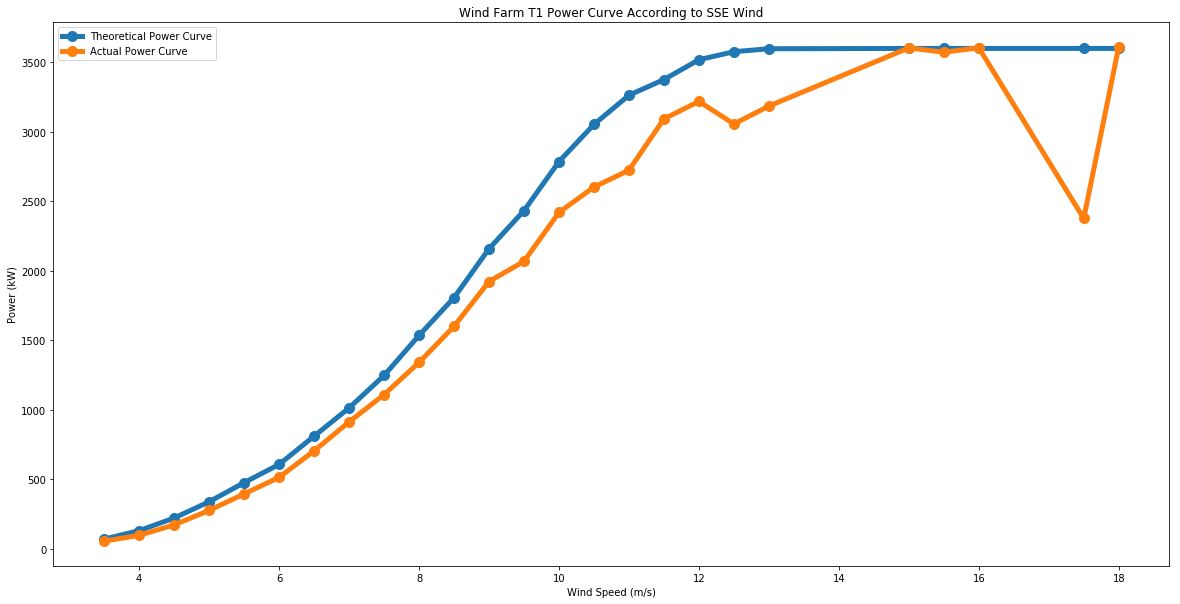

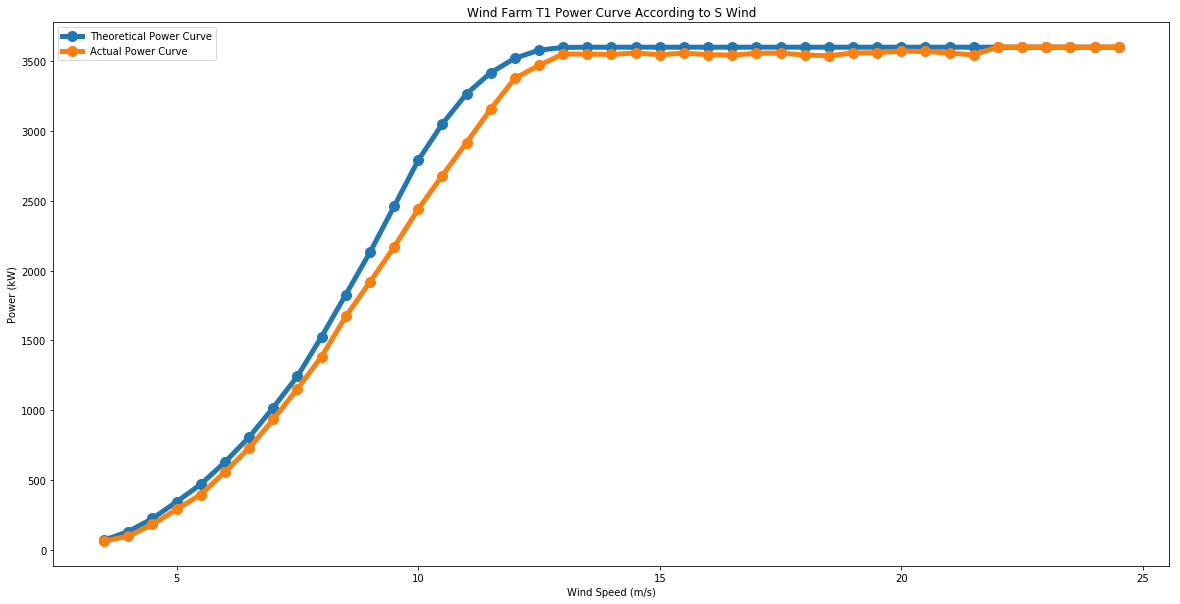

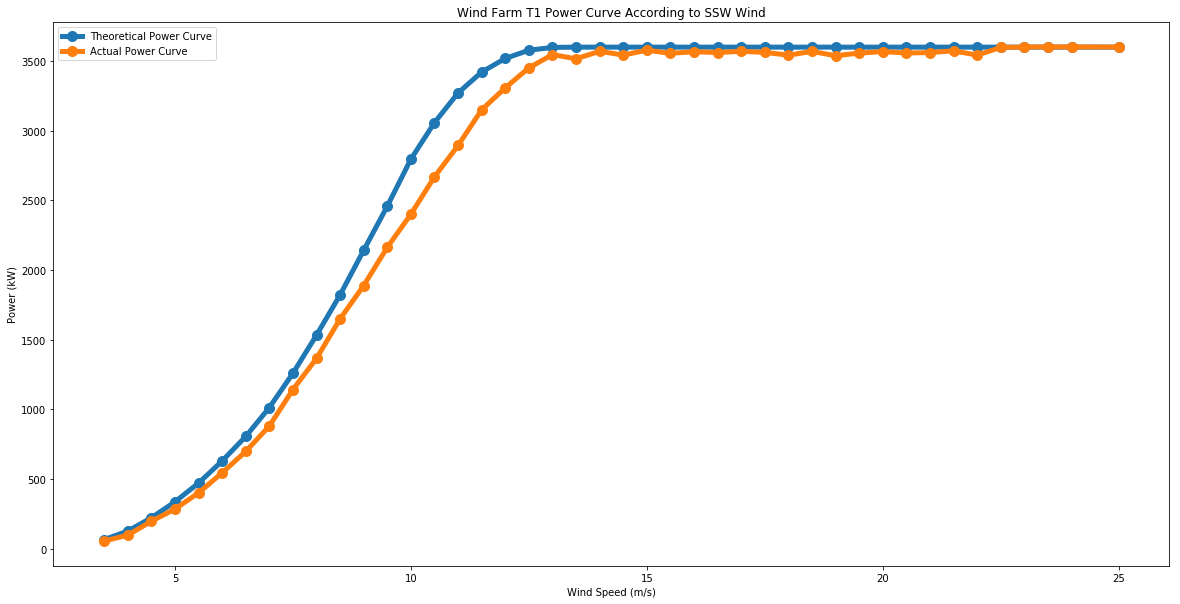

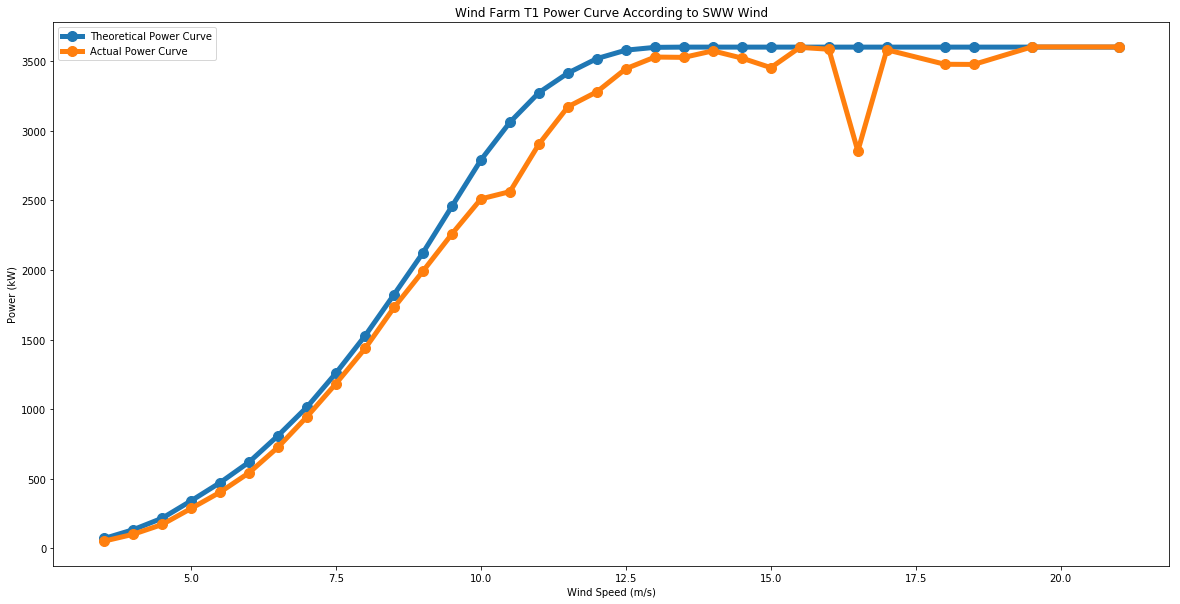

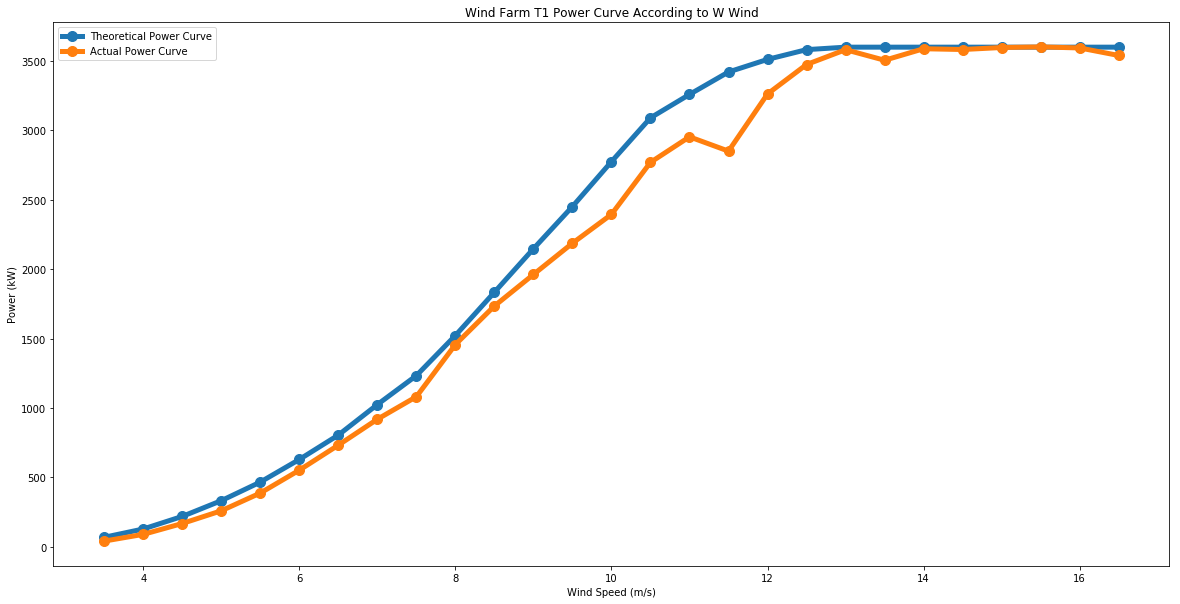

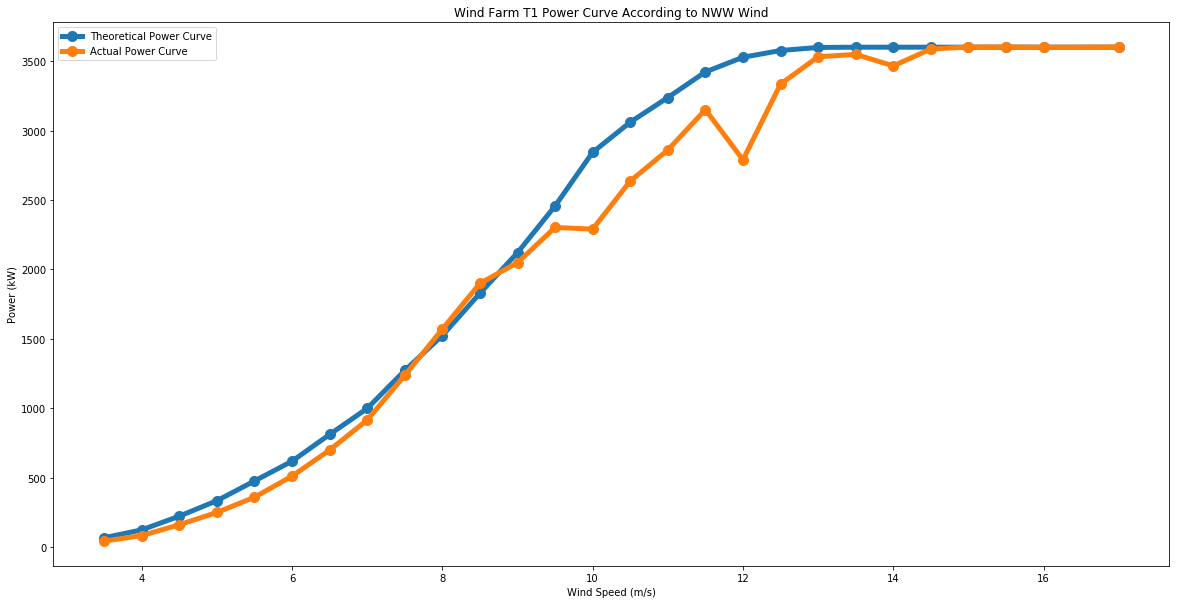

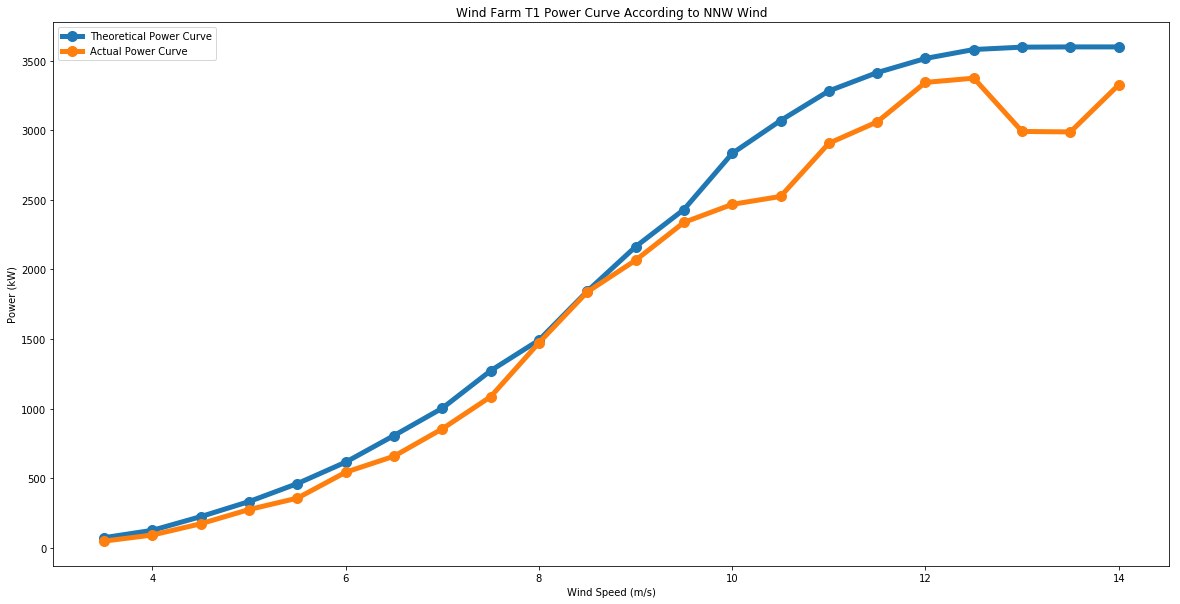

In [48]:
#Drawing power curve of the turbine for all directions.
list_table=[data_T_N,data_T_NNE,data_T_NEE,data_T_E,data_T_SEE,data_T_SSE,data_T_S,
            data_T_SSW,data_T_SWW,data_T_W,data_T_NWW,data_T_NNW]

list_tableName=["N","NNE","NEE","E","SEE","SSE","S","SSW","SWW","W","NWW","NNW"]

def graph_T(i):
    fig = plt.figure(figsize=(20,10))  
    plt.plot(list_table[i]["WindSpeed(m/s)"],list_table[i]["Theoretical_Power_Curve (KWh)"],label="Theoretical Power Curve",
             marker="o",markersize=10,linewidth = 5)
    plt.plot(list_table[i]["WindSpeed(m/s)"],list_table[i]["ActivePower(kW)"],label="Actual Power Curve",
             marker="o",markersize=10,linewidth = 5)
    plt.xlabel("Wind Speed (m/s)")
    plt.ylabel("Power (kW)")
    plt.title("Wind Farm {} Power Curve According to {} Wind".format(turbine_no,list_tableName[i]))
    plt.legend()
    plt.show()
    fig.savefig("{}_{}_Powercurve.jpeg".format(turbine_no,list_tableName[i]))
    plt.close(fig)

# "N"=0, "NNE"=1,"NEE"=2,"E"=3,"SEE"=4,"SSE"=5,"S"=6,"SSW"=7,"SWW"=8,"W"=9,"NWW"=10,"NNW"=11

for i in range(0,12):
    graph_T(i)

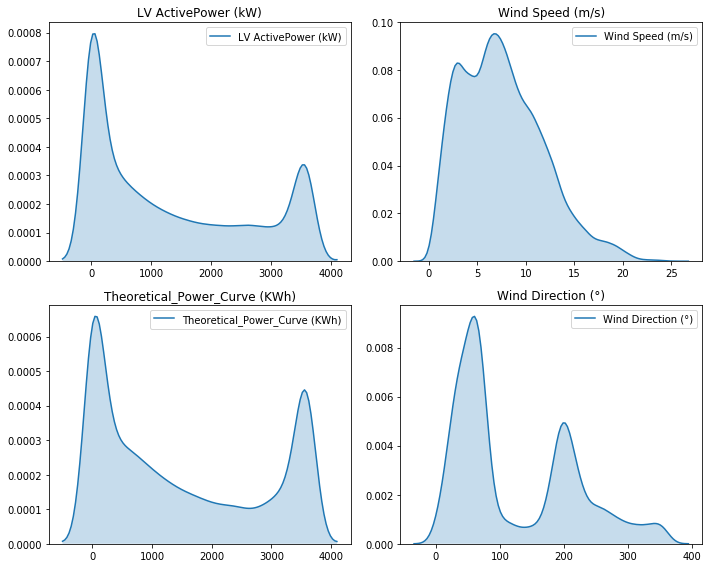

In [49]:
#plotting the data distribution
plt.figure(figsize=(10, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(data_T_start.iloc[:,i+1], shade=True)
    plt.title(data_T_start.columns[i+1])
plt.tight_layout()
plt.show()

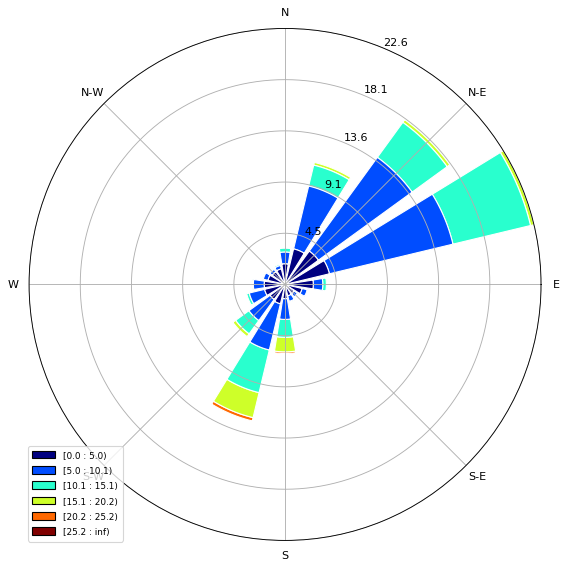

In [50]:
ax = WindroseAxes.from_ax()
ax.bar(data_T_start['Wind Direction (°)'], data_T_start['Wind Speed (m/s)'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.show()